# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Data Loading & EDA 

In [2]:
data = pd.read_csv ('D://Datasets/Iris.csv')
data.head ()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.ndim

2

In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.isna ().sum ()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.duplicated ().sum ()

0

In [8]:
data.describe ()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
data ['Species'].nunique ()

3

In [12]:
data ['Species'].unique ()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
data ['Species'].unique ()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
data ['Species'].replace (data ['Species'].unique (), [0, 1, 2], inplace=True)
data.head (1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0


In [15]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [16]:
data.drop (['Id'], axis=1, inplace=True)
data.head (3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### Data Visualization

In [17]:
rcParams ['figure.figsize'] = (10, 6)

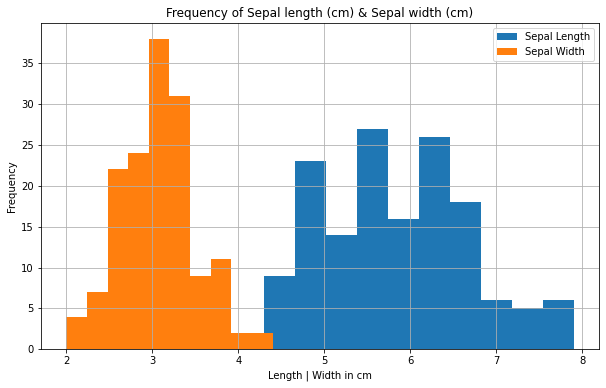

In [18]:
plt.title ('Frequency of Sepal length (cm) & Sepal width (cm)')
plt.xlabel ('Length | Width in cm')
plt.ylabel ('Frequency')
plt.grid ()
data ['SepalLengthCm'].hist (label='Sepal Length')
data ['SepalWidthCm'].hist (label='Sepal Width')
plt.legend ()
plt.show ()

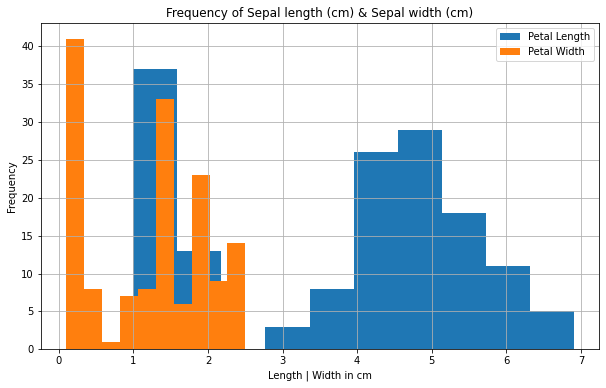

In [19]:
plt.title ('Frequency of Sepal length (cm) & Sepal width (cm)')
plt.xlabel ('Length | Width in cm')
plt.ylabel ('Frequency')
plt.grid ()
data ['PetalLengthCm'].hist (label='Petal Length')
data ['PetalWidthCm'].hist (label='Petal Width')
plt.legend ()
plt.show ()

In [20]:
corr = data.corr ()
corr = corr.iloc [4:, :]
display (corr)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Species,0.782561,-0.419446,0.949043,0.956464,1.0


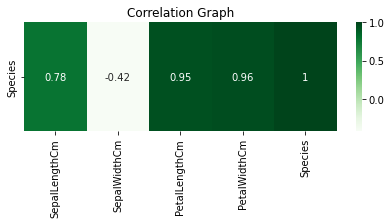

In [21]:
rcParams ['figure.figsize']= (7, 2)
plt.title ('Correlation Graph')
sns.heatmap (corr, annot=True, cmap='Greens')
plt.show ()

# Data Splitting

In [22]:
x = data.drop (['Species'], axis=1).values
print (x.shape)

(150, 4)


In [23]:
y = data ['Species'].values
print (y.shape)

(150,)


In [24]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state=42)
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


# Model building

In [25]:
model = LogisticRegression ()
model.fit (x_train, y_train)
y_pred = model.predict (x_test)
print ("Accuracy: ", accuracy_score (y_test, y_pred)*100, "%")

Accuracy:  100.0 %


In [26]:
model = LogisticRegression (C=1)
model.fit (x_train, y_train)
y_pred_whole = model.predict (x)
print ("Accuracy: ", accuracy_score (y, y_pred_whole)*100, "%")

Accuracy:  97.33333333333334 %


# Comparing true values and predicted values

In [27]:
df = pd.concat ([pd.DataFrame ({'Y': y}), pd.DataFrame ({'Y_pred': y_pred_whole})], axis=1)

In [28]:
df

,Y,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


# Model Evaluation

In [29]:
print (f'Accuracy: {round (accuracy_score (y, y_pred_whole)*100)}%')

Accuracy: 97%


In [30]:
print ('Confusion Matrix ')
print (confusion_matrix (y, y_pred_whole))

Confusion Matrix 
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [31]:
print ('Classification report')
print (classification_report (y, y_pred_whole))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

